In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm

In [ ]:
#We are interested to see how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, effect admission into graduate school at UCLA. The data for this analysis is collected from (http://stats.idre.ucla.edu/).
#The admit variable, admit/not admitted, is a binary variable. data can be obtained from our website from within R.

In [2]:
mydata = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
## view the first few rows of the data
mydata.head

<bound method NDFrame.head of      admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
..     ...  ...   ...   ...
395      0  620  4.00     2
396      0  560  3.04     3
397      0  460  2.63     2
398      0  700  3.65     2
399      0  600  3.89     3

[400 rows x 4 columns]>

In [ ]:
# This dataset has a binary response (outcome, dependent) variable called admit.
#There are three predictor variables: gre, gpa and rank. We will treat the variables gre and gpa as continuous.
#The variable rank takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest. We can get basic descriptives for the entire data set by using summary. To get the standard deviations,
#we use sapply to apply the sd function to each variable in the dataset.

In [3]:
mydata.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [ ]:
#The code below estimates a logistic regression model using the glm (generalized linear model) function. 
#First, we convert rank to a factor to indicate that rank should be treated as a categorical variable.

In [4]:
mydata['rank_cat'] = mydata['rank'].astype('category')
feature_cols = ['gre', 'gpa', 'rank_cat']
X = mydata[feature_cols] # independent variable
Y = mydata.admit # dependent variable
X

,gre,gpa,rank_cat
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
395,620,4.00,2
396,560,3.04,3
397,460,2.63,2
398,700,3.65,2


In [5]:
y, X = dmatrices('admit ~ gre + gpa + C(rank)', mydata, return_type = 'dataframe')

In [6]:
logit = sm.Logit(Y, X)
logreg = logit.fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Jun 2021   Pseudo R-squ.:                 0.08292
Time:                        09:32:39   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre              0.0023      0.001      2.070      0.038       0.000       0.004
gpa              0.8040      0.332      2.423      0.015       0.154       1.454
================================================================================
"""

In [ ]:
***
# How do you analyze the outputs of this model?

***

#* In the output above, the first thing we see is the call, this is R reminding us what the model we ran was,
#what options we specified, etc.

#* Next we see the deviance residuals, which are a measure of model fit. 
#This part of output shows the distribution of the deviance residuals for individual cases used in the model.
#Below we discuss how to use summaries of the deviance statistic to assess model fit.

#* The next part of the output shows the coefficients, their standard errors,
#the z-statistic (sometimes called a Wald z-statistic), and the associated p-values.
#Both gre and gpa are statistically significant, as are the three terms for rank. 
#The logistic regression coefficients give the change in the log odds of the outcome for a one unit increase in the predictor variable.
 #   + For every one unit change in GRE, the log odds of admission (versus non-admission) increases by 0.002.
   
#    + For a one unit increase in GPA, the log odds of being admitted to graduate school increases by 0.804.
    
 #   + The indicator variables for rank have a slightly different interpretation.
#For example, having attended an undergraduate institution with rank of 2, versus an institution with a rank of 1, changes the log odds of admission by -0.675.

In [ ]:
#**Plotting logistic regression and classes in R**

#Create an imaginary dataset of 20 individuals of different body sizes


In [7]:
n = 20
std = 2
mean = 30
bodysize = np.random.normal(loc=mean, scale=std, size=n)
bodysize = np.array([26,27,28,28,28,28,29,29,29,29,30,30,30,30,31,31,32,32,34,35])
survive= np.array([0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1])
dat = pd.DataFrame({'bodysize':bodysize,'survive':survive})
y, X = dmatrices('survive ~ bodysize', dat, return_type = 'dataframe')

In [ ]:
#Now we can plot using the glm model based on each feature as follows. Here we just have one feature which is Body Size:


Optimization terminated successfully.
         Current function value: 0.507163
         Iterations 7


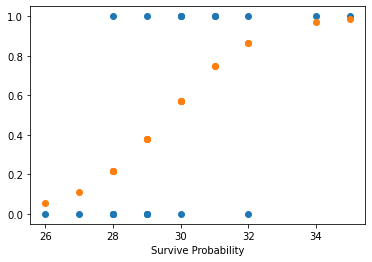

In [8]:
logit = sm.Logit(y , X)
logreg = logit.fit()
pred = logreg.predict(X)
plt.scatter(dat['bodysize'], dat['survive'])
plt.scatter(dat['bodysize'], pred)
plt.xlabel('Bodysize')
plt.xlabel('Survive Probability')
plt.show()

In [12]:
#Q3.Read the yelp dataset provided in the course shell. 
yelp = pd.read_csv('https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/yelp_lab8.csv')

In [ ]:
#*Note on the Dataset*: 
#This dataset has been pre-processed and includes the restaurants registered in Yelp platform within the regions of Toronto, Markham and Mississauga. 
#The original dataset is downloaded from: https://www.kaggle.com/ivy1219/analysis-on-yelp/data or can be directly downloaded from yelp website in JSON or SQL format: https://www.yelp.com/dataset. 
#Here is the description given from the Yelp website: "The Yelp dataset is a subset of our businesses, reviews, and user data for use in personal, educational, and academic purposes. Available in both JSON and SQL files, use it to teach students about databases, to learn NLP, or for sample production data while you learn how to make mobile apps."

#*Goal*
#The goal is to estimate how well will a restaurant's rating be, through the number of stars on Yelp, depending on the type of restaurant, location and number of reviews. We want to know if a restaurant will be rated as 4 or 5 stars or less than 4 stars.
#Our dependent variable is: stars.
#For simplicity, we have gruped the stars variable as follows: 
#- 1, 1.5, 2, 2.5, 3 or 3.5 stars are set to 0 (considered a 'failure' in the glm model)
#- 4, 4.5, or 5 stars are set to 1 (considered a 'success' in the glm model)

#*Splitting the data*

In [13]:
train_set, test_set = train_test_split(yelp, train_size=0.7, random_state=1)

In [14]:
y_train, X_train = dmatrices('stars ~ city + review_count + categories', train_set, return_type = 'dataframe')
logit = sm.Logit(y_train , X_train)
logreg = logit.fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.623758
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stars   No. Observations:                 6453
Model:                          Logit   Df Residuals:                     6441
Method:                           MLE   Df Model:                           11
Date:                Wed, 09 Jun 2021   Pseudo R-squ.:                 0.02474
Time:                        09:40:26   Log-Likelihood:                -4025.1
converged:                       True   LL-Null:                       -4127.2
Covariance Type:            nonrobust   LLR p-value:                 9.756e-38
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.5881      0.116    -13.741      0.000      -1.815      -1.362
city[T.Missisauga]                     0.6905      0.131      5.259      0.000       0.433       0.948
city[T.Toronto]                        0.6359      0.114      5.569      0.000       0.412       0.860
categories[T.Coffee or Sandwiches]     0.6718      0.092      7.325      0.000       0.492       0.852
categories[T.Fast Food]               -0.2321      0.092     -2.526      0.012      -0.412      -0.052
categories[T.Italian]                  0.5280      0.161      3.281      0.001       0.213       0.843
categories[T.Latin]                    0.4463      0.132      3.391      0.001       0.188       0.704
categories[T.Middle Eastern]           0.2053      0.094      2.183      0.029       0.021       0.390
categories[T.North American]           0.2303      0.100      2.304      0.021       0.034       0.426
categories[T.Other]                    0.4639      0.104      4.441      0.000       0.259       0.669
categories[T.Pub]                      0.4792      0.110      4.352      0.000       0.263       0.695
review_count                           0.0024      0.000      5.880      0.000       0.002       0.003
======================================================================================================
"""

In [ ]:
#Before proceeding to the model evaluation, let us predict an outcome with the glm_model that we constructed on the training set.

#Let's assume a new coffee shop has just opened in Toronto and wants to know how many stars it is likely to get if the business registers in Yelp. The coffee shop is expecting to receive 200 reviews from its customers. 
#Predict the likelihood of the coffee shop to be ranked as 4, 4.5 or 5 stars. Derive the result using the information in summary(glm_model) on one hand, and using the 'predict' function.

#Hint for using the information in summary(glm_model): 1/(1+exp(-(y)), where y is the output of the linear model. Remember that glm gives us the log odds of a restaurant (or coffee shop) to have 4, 4.5 or 5 stars.

#Manual Calculation

In [16]:
# 1/(1+exp(-((Intercept)+cityToronto+200*review_count+categoriesCoffee or Sandwiches))) 

In [17]:
y_test, X_test = dmatrices('stars ~ city + review_count + categories', test_set, return_type = 'dataframe')
pred = logreg.predict(X_test)
pred = pred > 0.5
actual = y_test > 0.5

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, pred)
print(cm)
accuracy = float((cm[0][0] + cm[1][1]))/float(len(actual))
print(accuracy)

[[1784   23]
 [ 929   30]]
0.6558206796818511


In [ ]:
#In this approach, we have set the threshhold to 0.5. 
#Meaning that all probability equal or higher to 0.5 will be classified as a success (greater than 4 stars ranking)
#and all probability less than 0.5 will be classified as a failure (less than 4 stars ranking). 
#Try to change the threshhold and compare the accuracy level of the classifer.